<a href="https://colab.research.google.com/github/rohitsurana3008/InterviewPractice/blob/Development/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np


In [0]:
def save_figure(image, number, fig, fig_dir):
    """Saves a figure to disk as png.
    Arguments:
    image -- A 2-D matrix of pixels, values from 0 to 1, black and white
    number -- A number used for image title and filename
    fig -- Initialized pyplot figure, we do not create a new one every time
    fig_dir -- Directory in which to save figure
    """
    plt.clf()
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title('Step {}'.format(number))
    save_path = os.path.join(fig_dir, 'fig_step_{:06d}'.format(number))
    # Additional arguments used to get rid of unneeded boundaries in the image
    fig.savefig(save_path, bbox_inches='tight', pad_inches=0)


In [0]:
def autoencoder(x, output_size, outer_size=500, inner_size=1000,
                name='autoencoder'):
    """Defines TensorFlow autoencoder model.
    Arguments:
    x -- Input tensor
    output_size -- Output layer size (should be the same as input)
    outer size -- Used for encoder and decoder layer sizes
    inner_size -- Code (latent) layer size
    Returns:
    output -- Model outputs
    """
    with tf.variable_scope(name):
        encoder = tf.layers.dense(x, outer_size, name='encoder')
        code = tf.layers.dense(encoder, inner_size, name='code')
        decoder = tf.layers.dense(code, outer_size, name='decoder')
        output = tf.layers.dense(decoder, output_size, name='output')
        return output

In [0]:
def main(unused_argv):
    # Load MNIST data, NOTE: Deprecated and removed in TF 1.7
    mnist = tf.contrib.learn.datasets.load_dataset('mnist')
    # One example figure to reconstruct (for figures)
    example_fig = [mnist.train.images[10]]
    # Learning rate for Adam optimizer
    learning_rate = 0.001
    # Images are 28*28 pixels
    input_size = 28*28
    batch_size = 100
    # Total number of steps
    steps = 4000
    # Save training loss and image every [save_every] steps
    save_every = 100

    # Create figure directory if doesn't exist
    fig_dir = 'figures'
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    # Initialize pyplot figure, we only create one
    fig = plt.figure(frameon=False)

    # Input placeholder
    x = tf.placeholder(tf.float32, [None, input_size], name='input')
    output = autoencoder(x, input_size)
    loss = tf.losses.mean_squared_error(x, output)
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        # Writer for tensorboard
        writer = tf.summary.FileWriter('logdir', sess.graph)
        train_summary = tf.summary.scalar('train_loss', loss)

        for i in range(1, steps+1):
            # Take a new batch and train
            batch, _ = mnist.train.next_batch(batch_size)
            _, l, ts = sess.run([train_op, loss, train_summary],
                                feed_dict={x: batch})

            if i % save_every == 0:
                print('Training loss at step {0}: {1}'.format(i, l))
                writer.add_summary(ts, i)
                # Reconstruct example image
                result = sess.run([output], feed_dict={x: example_fig})
                # Reshape flat vector into an array
                reshaped = np.reshape(result, (28, 28))
                save_figure(reshaped, i, fig, fig_dir)

        # Use the whole test data for calculating final test loss
        test_data = mnist.test.images
        _, test_loss = sess.run([output, loss], feed_dict={x: test_data})
        print('Final test loss: {}'.format(test_loss))

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Training loss at step 100: 0.015257132239639759
Training loss at step 200: 0.009969194419682026
Training loss at step 300: 0.008086182177066803
Training loss at step 400: 0.007097399793565273
Training loss at step 500: 0.005686723627150059
Training loss at step 600: 0.0065235113725066185
Training loss at step 700: 0.005977568216621876
Training loss at step 800: 0.006191653199493885
Training loss at step 900: 0.006368593778461218
Training loss at step 1000: 0.00633922778069973
Training loss at step 1100: 0.006401579361408949
Training loss at step 1200: 0.006648071575909853
Training loss at step 1300: 0.006703199353069067
Training loss at step 1400: 0.006107590161263943
Training loss at step 1500: 0.006250586826354265
Training loss at step 1600: 0.006481338758021593
Training loss at step 1700: 0.0

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


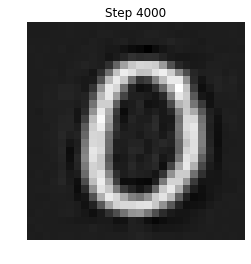

In [0]:

if __name__ == '__main__':
    tf.reset_default_graph()
    tf.logging.set_verbosity(tf.logging.INFO)
    tf.app.run(main=main)